   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500
Training Rows: 712
Testing Rows: 179
Model Training Score: 98.03%
Model Test Score: 80.45%


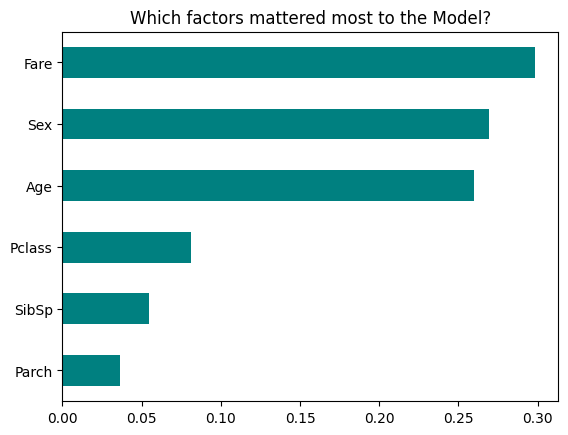

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/titanic_cleaned.csv')
df.head()

#convert sex to numbers
df['Sex'] = df['Sex'].map({'female':0, 'male':1})

#drop variables that won't help our model learn.
df_ml = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

print(df_ml.head())

#define our X and y
x = df_ml.drop('Survived', axis=1)
y = df_ml['Survived']

#perform train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #42 ensures reproducibility. Split will be the same everytime this code is run
print(f'Training Rows: {len(x_train)}')
print(f'Testing Rows: {len(x_test)}')

#fit first random forest classifier model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
print(f'Model Training Score: {model.score(x_train, y_train):.2%}')

test_accuracy = model.score(x_test, y_test)
print(f'Model Test Score: {test_accuracy:.2%}')

#get feature importance
import matplotlib.pyplot as plt

#plot importance
importances = pd.Series(model.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Which factors mattered most to the Model?')
plt.show()